### **Loading libraries**

In [1]:
pip install gender-guesser

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 6.2 MB/s eta 0:00:00


In [2]:
pip install requests

In [3]:
!pip install gender-guesser

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import copy

from scipy.stats import chisquare
import gender_guesser.detector as gender
import requests
import nltk
from nltk.corpus import names
import random

from scipy.stats import skew
import missingno as msno # to get visualization on missing values


### **Let us load the data**

In [5]:
from google.colab import drive
drive.mount('/content/drive')


df_orders = pd.read_csv('/content/drive/MyDrive/SSSWork/orders_export_1.csv')
df_cx = pd.read_csv('/content/drive/MyDrive/SSSWork/customers_export.csv')


Mounted at /content/drive


## Data Overview

- Observations
- Sanity checks

In [6]:
df_cx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6045 entries, 0 to 6044
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer ID                    6045 non-null   object 
 1   First Name                     5991 non-null   object 
 2   Last Name                      5875 non-null   object 
 3   Email                          6027 non-null   object 
 4   Accepts Email Marketing        6045 non-null   object 
 5   Default Address Company        9 non-null      object 
 6   Default Address Address1       1393 non-null   object 
 7   Default Address Address2       1381 non-null   object 
 8   Default Address City           1392 non-null   object 
 9   Default Address Province Code  1390 non-null   object 
 10  Default Address Country Code   1457 non-null   object 
 11  Default Address Zip            1394 non-null   object 
 12  Default Address Phone          1374 non-null   o

In [7]:
df_cx.isnull().sum()

,0
Customer ID,0
First Name,54
Last Name,170
Email,18
Accepts Email Marketing,0
Default Address Company,6036
Default Address Address1,4652
Default Address Address2,4664
Default Address City,4653
Default Address Province Code,4655


<Axes: >

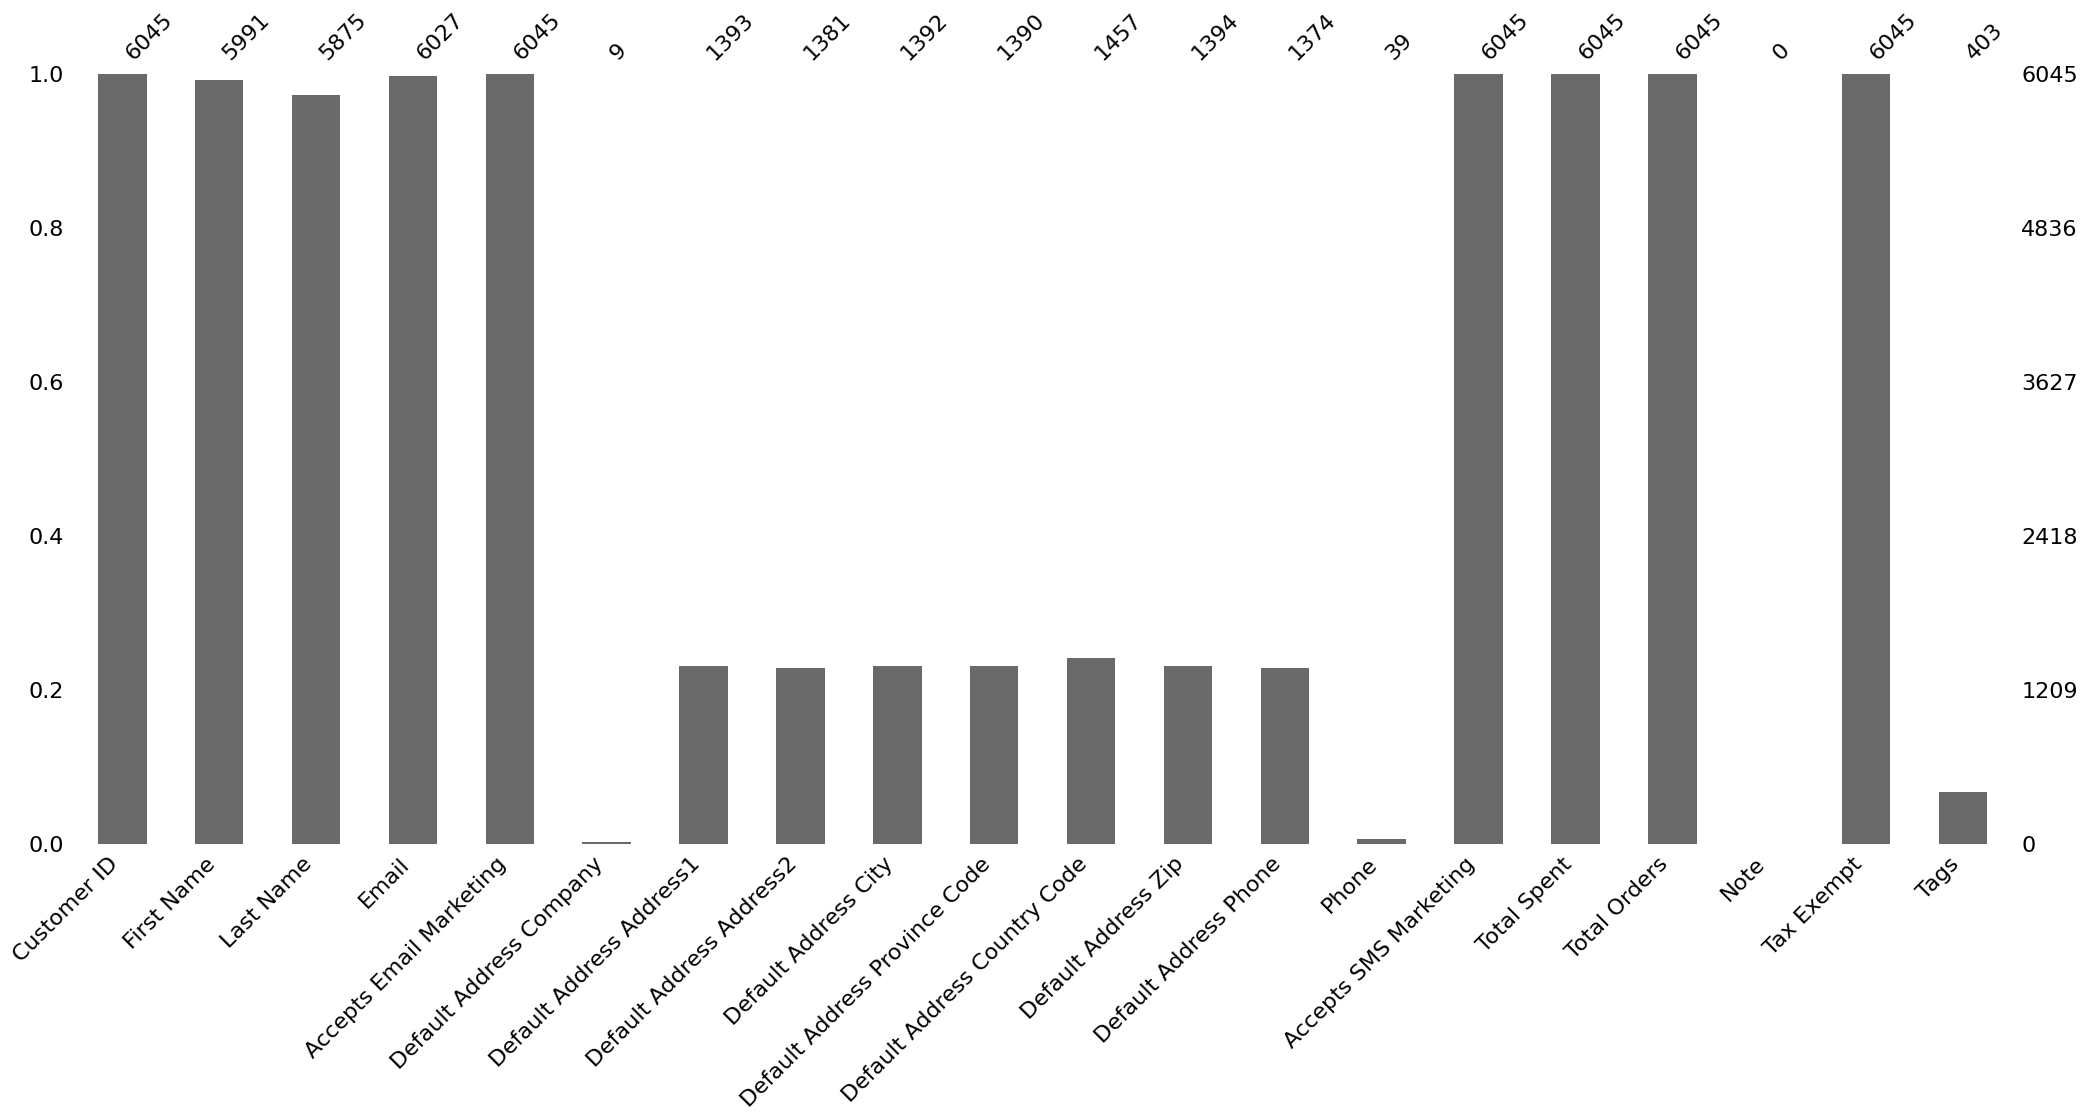

In [8]:
#Visualize missing values
msno.bar(df_cx)

**Customer Data Analysis**

In [9]:
def add_gender_column(df, name_column='First Name', gender_column='Gender'):
    """
    Adds a gender column to the DataFrame based on the names provided.

    Parameters:
    - df (pd.DataFrame): The input DataFrame containing names.
    - name_column (str): The name of the column in df that contains the names. Default is 'name'.
    - gender_column (str): The name of the new column to be added with gender information. Default is 'gender'.

    Returns:
    - pd.DataFrame: The DataFrame with an added gender column.
    """
    # Initialize the gender detector
    d = gender.Detector(case_sensitive=False)

    # Define a helper function to get gender for a single name
    def get_gender(name):
        if isinstance(name, str):
            return d.get_gender(name.split()[0])  # Use first name in case of full names
        else:
            return 'unknown'

    # Apply the helper function to the name column to create the gender column
    df[gender_column] = df[name_column].apply(get_gender)

    return df

In [10]:
df_cx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6045 entries, 0 to 6044
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer ID                    6045 non-null   object 
 1   First Name                     5991 non-null   object 
 2   Last Name                      5875 non-null   object 
 3   Email                          6027 non-null   object 
 4   Accepts Email Marketing        6045 non-null   object 
 5   Default Address Company        9 non-null      object 
 6   Default Address Address1       1393 non-null   object 
 7   Default Address Address2       1381 non-null   object 
 8   Default Address City           1392 non-null   object 
 9   Default Address Province Code  1390 non-null   object 
 10  Default Address Country Code   1457 non-null   object 
 11  Default Address Zip            1394 non-null   object 
 12  Default Address Phone          1374 non-null   o

In [11]:
#Drop useless columns
df_cx.drop(columns=['Default Address Company'], inplace=True)
df_cx.drop(columns=['Default Address Phone'], inplace=True)
df_cx.drop(columns=['Phone'], inplace=True)
df_cx.drop(columns=['Accepts SMS Marketing'], inplace=True)
df_cx.drop(columns=['Note'], inplace=True)
df_cx.drop(columns=['Tax Exempt'], inplace=True)
df_cx.drop(columns=['Tags'], inplace=True)

In [12]:
df_cx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6045 entries, 0 to 6044
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer ID                    6045 non-null   object 
 1   First Name                     5991 non-null   object 
 2   Last Name                      5875 non-null   object 
 3   Email                          6027 non-null   object 
 4   Accepts Email Marketing        6045 non-null   object 
 5   Default Address Address1       1393 non-null   object 
 6   Default Address Address2       1381 non-null   object 
 7   Default Address City           1392 non-null   object 
 8   Default Address Province Code  1390 non-null   object 
 9   Default Address Country Code   1457 non-null   object 
 10  Default Address Zip            1394 non-null   object 
 11  Total Spent                    6045 non-null   float64
 12  Total Orders                   6045 non-null   i

In [13]:
add_gender_column(df_cx)

,Customer ID,First Name,Last Name,Email,Accepts Email Marketing,Default Address Address1,Default Address Address2,Default Address City,Default Address Province Code,Default Address Country Code,Default Address Zip,Total Spent,Total Orders,Gender
0,'6237948444924,jimena,ruiz,jimenaruizallende@gmail.com,yes,colina 84b,l,lomas de bezares,DF,MX,11910,0.0,0,female
1,'6238253449468,Florencia,Bravo,ventas@tintarella.com.mx,no,Avenida Stim,"79, piso 3",Lomas del Chamizal,DF,MX,'05120,0.0,0,female
2,'6241975927036,melissa,aguirre,sm_aguirre@hotmail.com,no,san luis 40,la primavera,culiacan,SIN,MX,80199,1563.0,1,female
3,'6242017050876,Maria,Ballesteros,ballesterosm96@gmail.com,yes,"305 Webster Ave, unit 407",unit 407,Cambridge,MA,US,'02141,0.0,0,female
4,'6242280276220,Paula,Puron,paulappt18@gmail.com,no,camino real a cholula 4814 fraccionamiento la ...,Casa nunero 7,Puebla,PUE,MX,72813,693.6,1,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,'7620710498556,Nadia rdz,NaN,nadiar@alarmasprotektor.com,yes,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,female
6041,'7620789534972,Claudia,NaN,claudiat85@hotmail.com,yes,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,female
6042,'7621811568892,Carola,Maurer walls,carolamaurerw@gmail.com,yes,Fuente de la escondida 33 lomas de las palmas,Casa,Ciudad de mexico,MEX,MX,52788,0.0,0,female
6043,'7622519095548,Newsletter,Subscriber,fer.naime@icloud.com,yes,NaN,NaN,NaN,NaN,MX,NaN,0.0,0,unknown


In [14]:
df_cx.head(30)

,Customer ID,First Name,Last Name,Email,Accepts Email Marketing,Default Address Address1,Default Address Address2,Default Address City,Default Address Province Code,Default Address Country Code,Default Address Zip,Total Spent,Total Orders,Gender
0,'6237948444924,jimena,ruiz,jimenaruizallende@gmail.com,yes,colina 84b,l,lomas de bezares,DF,MX,11910,0.00,0,female
1,'6238253449468,Florencia,Bravo,ventas@tintarella.com.mx,no,Avenida Stim,"79, piso 3",Lomas del Chamizal,DF,MX,'05120,0.00,0,female
2,'6241975927036,melissa,aguirre,sm_aguirre@hotmail.com,no,san luis 40,la primavera,culiacan,SIN,MX,80199,1563.00,1,female
3,'6242017050876,Maria,Ballesteros,ballesterosm96@gmail.com,yes,"305 Webster Ave, unit 407",unit 407,Cambridge,MA,US,'02141,0.00,0,female
4,'6242280276220,Paula,Puron,paulappt18@gmail.com,no,camino real a cholula 4814 fraccionamiento la ...,Casa nunero 7,Puebla,PUE,MX,72813,693.60,1,female
5,'6242430648572,Paola,Medrano,paolamedranot@gmail.com,yes,"Bellavista,",bellavista,México,MEX,MX,54710,0.00,0,female
6,'6243215474940,Roger,Jimenez,rogerjimro@hotmail.com,yes,Privada de la Cañada 30,402C,Huixquilucan,MEX,MX,52774,653.60,1,male
7,'6247756857596,Gonzalo,Rodríguez,gonzalorz1985@gmail.com,yes,Damas 110,701,cdmx,DF,MX,'03900,1265.20,1,male
8,'6248412905724,Maximo,Budib Hurle,maximo.1996@hotmail.com,yes,Segunda cerrada de cruz de piedra 1 Fraccionam...,1,Puebla,PUE,MX,72130,1563.00,1,unknown
9,'6248970420476,Damian,Benfatto,damianbenfatto@gmail.com,no,Arquimedes 214,802,CDMX,DF,MX,11550,2563.30,1,male


In [15]:
df_cx['Gender'].value_counts()

,count
Gender,
female,3031
male,2291
unknown,555
mostly_female,83
mostly_male,70
andy,15


In [16]:
import requests

def gender_api_guess(name, api_key):
    url = f"https://gender-api.com/get?key={api_key}&name={name}"
    response = requests.get(url)
    data = response.json()
    return data.get('gender', 'Unknown')

# Example usage
api_key = 'ceaf7b036bb4878c78647362ba14c4176204856db095808c03160350f95ca9dc'
df_cx['Gender'] = df_cx.apply(
    lambda row: gender_api_guess(row['First Name'], api_key) if row['Gender'] == 'Unknown' else row['Gender'],
    axis=1
)


In [17]:
df_cx['Gender'].value_counts()

,count
Gender,
female,3031
male,2291
unknown,555
mostly_female,83
mostly_male,70
andy,15


In [18]:
# Filter the DataFrame to include only rows where the 'Gender' is 'andy'
andy_df = df_cx[df_cx['Gender'] == 'unknown']

# Display the filtered DataFrame
andy_df.head(40)

,Customer ID,First Name,Last Name,Email,Accepts Email Marketing,Default Address Address1,Default Address Address2,Default Address City,Default Address Province Code,Default Address Country Code,Default Address Zip,Total Spent,Total Orders,Gender
8,'6248412905724,Maximo,Budib Hurle,maximo.1996@hotmail.com,yes,Segunda cerrada de cruz de piedra 1 Fraccionam...,1,Puebla,PUE,MX,72130,1563.0,1,unknown
10,'6249060663548,Nacif,letayf Karen,karennacifl@hotmail.com,no,Carretera A La Flor 602 Torres Toscana,Departamento,Durango,DGO,MX,34185,2278.0,1,unknown
23,'6255806415100,Ethson,Hernández,bladimeneses25@hotmail.com,yes,Alfredo Mtz G Mz 2 LT 81,Casa,Ciudad de México,DF,MX,'09578,0.0,0,unknown
24,'6255818866940,Ethson,Hernández,NaN,no,Alfredo MTZ G MZ2 LT81,Casa,Ciudad de México,DF,MX,'09578,0.0,0,unknown
34,'6268180005116,zianya,martinez,zianya@tintarella.com.mx,yes,Lago andromaco 53,701c,Mexico,DF,MX,11529,0.0,0,unknown
45,'6272161939708,Perezanta,", Fernanda",fernanda.perezanta@gmail.com,no,Bosque de Abedules 54,Casa,Ciudad de México,DF,MX,11700,521.6,1,unknown
70,'6286326694140,Dennise,Crespo Smith,decres@gmail.com,yes,Cerrada de Sierra Vertientes 11,Lomas de Chapultepec,Ciudad de Mexico,DF,MX,11000,2328.0,1,unknown
76,'6293925691644,Marene,Huerta,marenehuerta@yahoo.com,yes,Fernando Alencastre 115,Departamemto 9,Ciudad de Mexico,DF,MX,11000,2005.2,1,unknown
84,'6295845765372,Dhehe,HeheeH,h@gmail.com,no,Boulevard Luis Donaldo Colosio 414,Nevado,Hermosillo,AGS,MX,83250,0.0,0,unknown
100,'6306563752188,Sevilla,Renee,rensevi@gmail.com,yes,Avenida Explanada 1175,Lomas de chapultepec,Ciudad De MÉxico,DF,MX,11000,0.0,0,unknown


In [19]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram


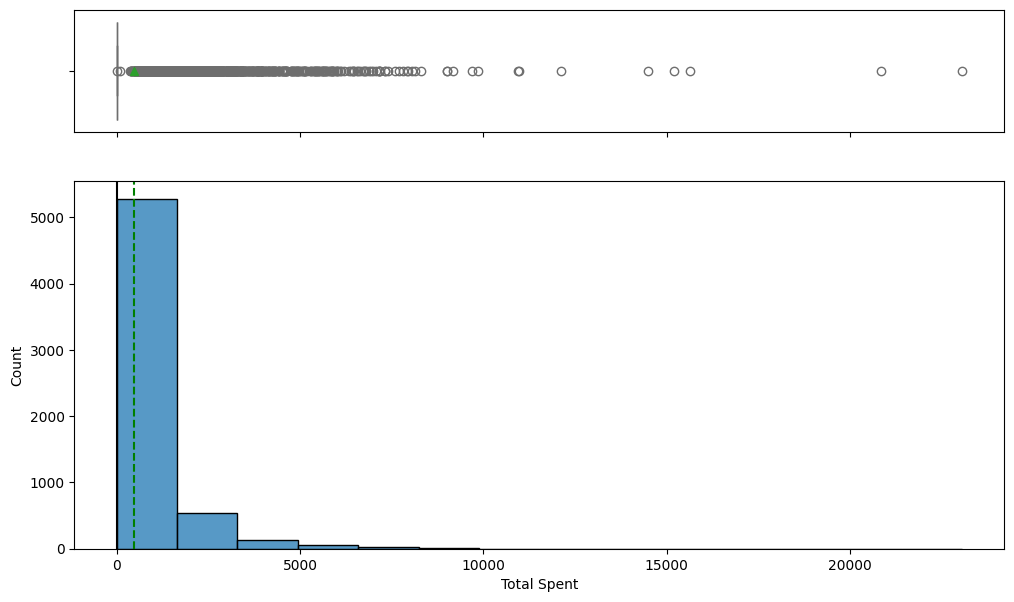

In [20]:
histogram_boxplot(df_cx,'Total Spent')

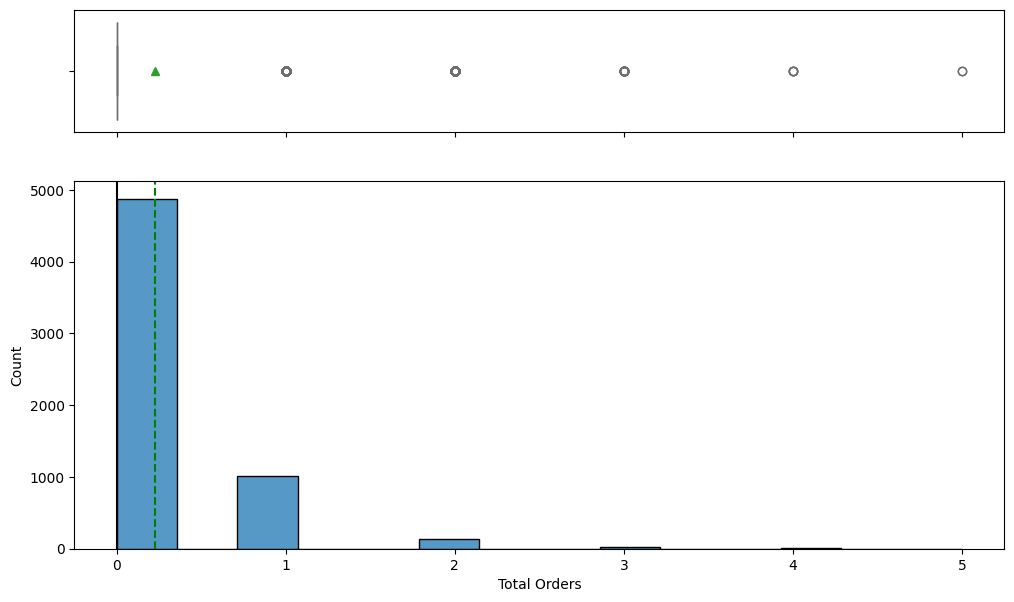

In [21]:
histogram_boxplot(df_cx,'Total Orders')

In [22]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])            # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )                              # Percentage of each class of the category
        else:
            label = p.get_height()         # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )                                 # Annotate the percentage

    plt.show()                            # Show the plot

**Total Orders**

<ipython-input-22-0e6a1d369299>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


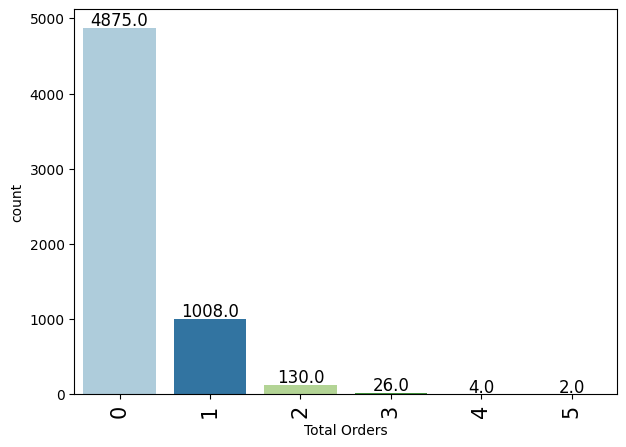

In [23]:
labeled_barplot(df_cx, 'Total Orders')

**Gender of customers with 1 or more orders**

<ipython-input-22-0e6a1d369299>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


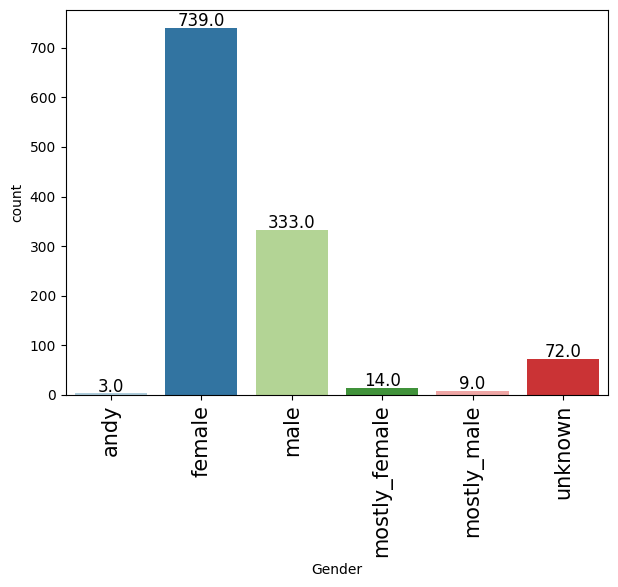

In [24]:

ordersGender_df = df_cx[df_cx['Total Orders'] >= 1]

labeled_barplot(ordersGender_df, 'Gender')

**Gender of customers with 0 orders**

<ipython-input-22-0e6a1d369299>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


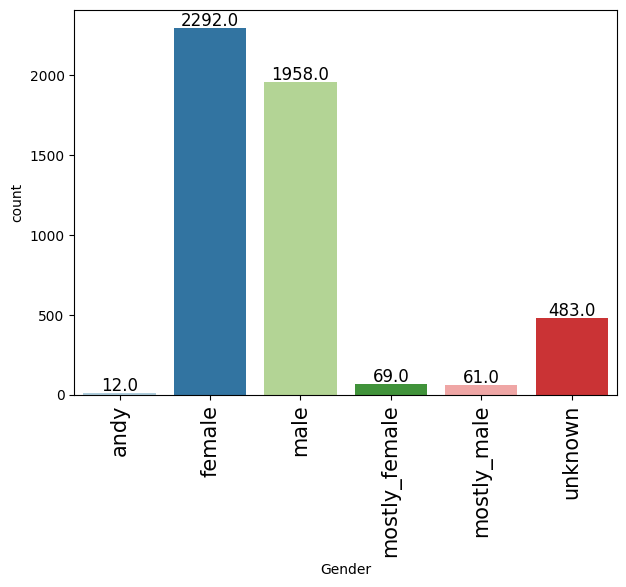

In [25]:

ordersGender1_df = df_cx[df_cx['Total Orders'] == 0]

labeled_barplot(ordersGender1_df, 'Gender')

**Gender of people who spent more than 5000 over time**

<ipython-input-22-0e6a1d369299>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


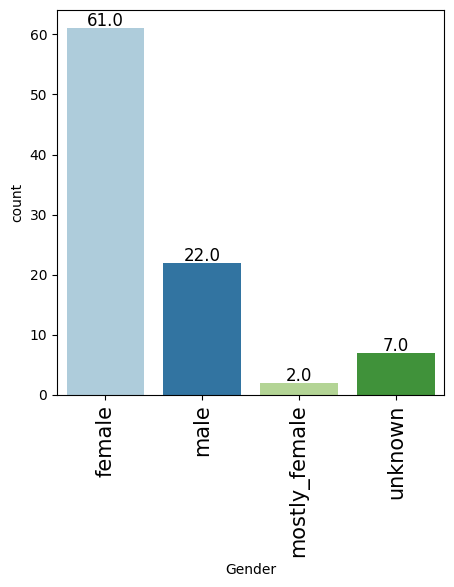

In [26]:
ordersGender2_df = df_cx[df_cx['Total Spent'] >= 5000]

labeled_barplot(ordersGender2_df, 'Gender')

# Location insights from clients.

In [27]:
#Cleaning of zipcode information, there'
def clean_zipcode(zipcode):
    if isinstance(zipcode, str):
        cleaned_zip = zipcode.strip()
        cleaned_zip = cleaned_zip.replace("'", "")
        cleaned_zip = cleaned_zip.replace(",", "")
        return cleaned_zip
    else:
        return zipcode
df_cx['Default Address Zip'] = df_cx['Default Address Zip'].apply(clean_zipcode)
df_cx.head(30)

,Customer ID,First Name,Last Name,Email,Accepts Email Marketing,Default Address Address1,Default Address Address2,Default Address City,Default Address Province Code,Default Address Country Code,Default Address Zip,Total Spent,Total Orders,Gender
0,'6237948444924,jimena,ruiz,jimenaruizallende@gmail.com,yes,colina 84b,l,lomas de bezares,DF,MX,11910,0.00,0,female
1,'6238253449468,Florencia,Bravo,ventas@tintarella.com.mx,no,Avenida Stim,"79, piso 3",Lomas del Chamizal,DF,MX,05120,0.00,0,female
2,'6241975927036,melissa,aguirre,sm_aguirre@hotmail.com,no,san luis 40,la primavera,culiacan,SIN,MX,80199,1563.00,1,female
3,'6242017050876,Maria,Ballesteros,ballesterosm96@gmail.com,yes,"305 Webster Ave, unit 407",unit 407,Cambridge,MA,US,02141,0.00,0,female
4,'6242280276220,Paula,Puron,paulappt18@gmail.com,no,camino real a cholula 4814 fraccionamiento la ...,Casa nunero 7,Puebla,PUE,MX,72813,693.60,1,female
5,'6242430648572,Paola,Medrano,paolamedranot@gmail.com,yes,"Bellavista,",bellavista,México,MEX,MX,54710,0.00,0,female
6,'6243215474940,Roger,Jimenez,rogerjimro@hotmail.com,yes,Privada de la Cañada 30,402C,Huixquilucan,MEX,MX,52774,653.60,1,male
7,'6247756857596,Gonzalo,Rodríguez,gonzalorz1985@gmail.com,yes,Damas 110,701,cdmx,DF,MX,03900,1265.20,1,male
8,'6248412905724,Maximo,Budib Hurle,maximo.1996@hotmail.com,yes,Segunda cerrada de cruz de piedra 1 Fraccionam...,1,Puebla,PUE,MX,72130,1563.00,1,unknown
9,'6248970420476,Damian,Benfatto,damianbenfatto@gmail.com,no,Arquimedes 214,802,CDMX,DF,MX,11550,2563.30,1,male


In [28]:
df_cx['country_zipcode'] = df_cx['Default Address Country Code'] + '-' + df_cx['Default Address Zip']

In [29]:
df_cx.head(10)

,Customer ID,First Name,Last Name,Email,Accepts Email Marketing,Default Address Address1,Default Address Address2,Default Address City,Default Address Province Code,Default Address Country Code,Default Address Zip,Total Spent,Total Orders,Gender,country_zipcode
0,'6237948444924,jimena,ruiz,jimenaruizallende@gmail.com,yes,colina 84b,l,lomas de bezares,DF,MX,11910,0.0,0,female,MX-11910
1,'6238253449468,Florencia,Bravo,ventas@tintarella.com.mx,no,Avenida Stim,"79, piso 3",Lomas del Chamizal,DF,MX,05120,0.0,0,female,MX-05120
2,'6241975927036,melissa,aguirre,sm_aguirre@hotmail.com,no,san luis 40,la primavera,culiacan,SIN,MX,80199,1563.0,1,female,MX-80199
3,'6242017050876,Maria,Ballesteros,ballesterosm96@gmail.com,yes,"305 Webster Ave, unit 407",unit 407,Cambridge,MA,US,02141,0.0,0,female,US-02141
4,'6242280276220,Paula,Puron,paulappt18@gmail.com,no,camino real a cholula 4814 fraccionamiento la ...,Casa nunero 7,Puebla,PUE,MX,72813,693.6,1,female,MX-72813
5,'6242430648572,Paola,Medrano,paolamedranot@gmail.com,yes,"Bellavista,",bellavista,México,MEX,MX,54710,0.0,0,female,MX-54710
6,'6243215474940,Roger,Jimenez,rogerjimro@hotmail.com,yes,Privada de la Cañada 30,402C,Huixquilucan,MEX,MX,52774,653.6,1,male,MX-52774
7,'6247756857596,Gonzalo,Rodríguez,gonzalorz1985@gmail.com,yes,Damas 110,701,cdmx,DF,MX,03900,1265.2,1,male,MX-03900
8,'6248412905724,Maximo,Budib Hurle,maximo.1996@hotmail.com,yes,Segunda cerrada de cruz de piedra 1 Fraccionam...,1,Puebla,PUE,MX,72130,1563.0,1,unknown,MX-72130
9,'6248970420476,Damian,Benfatto,damianbenfatto@gmail.com,no,Arquimedes 214,802,CDMX,DF,MX,11550,2563.3,1,male,MX-11550


**Default Adress Province Code**

In [30]:
df_cx['Default Address Province Code'] = df_cx['Default Address Province Code'].replace('Q ROO', 'ROO')

# Verify the changes
print(df_cx['Default Address Province Code'].unique())

['DF' 'SIN' 'MA' 'PUE' 'MEX' 'DGO' nan 'BC' 'TAMPS' 'JAL' 'YUC' 'NL' 'VER'
 'NAY' 'GTO' 'QRO' 'NY' 'TX' 'COL' 'AGS' 'ROO' 'MOR' 'VA' 'COAH' 'TAB'
 'GRO' 'MICH' 'BCS' 'TLAX' 'FL' 'SLP' 'CHIH' 'SON' 'CAMP' 'CHIS' 'HGO'
 'MO' 'OAX' 'MN' 'IL' 'NM' 'CA' 'MI' 'GI' 'M']


In [31]:
import pandas as pd
state_mapping = {
    "AGS": "Aguascalientes",
    "BC": "Baja California",
    "BCS": "Baja California Sur",
    "CAMP": "Campeche",
    "CHIS": "Chiapas",
    "CHIH": "Chihuahua",
    "COAH": "Coahuila",
    "COL": "Colima",
    "DF": "Ciudad de México",
    "DGO": "Durango",
    "GTO": "Guanajuato",
    "GRO": "Guerrero",
    "HGO": "Hidalgo",
    "JAL": "Jalisco",
    "MEX": "México",
    "MICH": "Michoacán",
    "MOR": "Morelos",
    "NAY": "Nayarit",
    "NL": "Nuevo León",
    "OAX": "Oaxaca",
    "PUE": "Puebla",
    "QRO": "Querétaro",
    "ROO": "Quintana Roo",
    "SLP": "San Luis Potosí",
    "SIN": "Sinaloa",
    "SON": "Sonora",
    "TAB": "Tabasco",
    "TAMPS": "Tamaulipas",
    "TLAX": "Tlaxcala",
    "VER": "Veracruz",
    "YUC": "Yucatán",
    "ZAC": "Zacatecas"
}


df_cx['State Full Name'] = df_cx['Default Address Province Code'].map(state_mapping)

print(df_cx[['Default Address Province Code', 'State Full Name']])


     Default Address Province Code   State Full Name
0                               DF  Ciudad de México
1                               DF  Ciudad de México
2                              SIN           Sinaloa
3                               MA               NaN
4                              PUE            Puebla
...                            ...               ...
6040                           NaN               NaN
6041                           NaN               NaN
6042                           MEX            México
6043                           NaN               NaN
6044                            DF  Ciudad de México

[6045 rows x 2 columns]


In [32]:
df_cx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6045 entries, 0 to 6044
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer ID                    6045 non-null   object 
 1   First Name                     5991 non-null   object 
 2   Last Name                      5875 non-null   object 
 3   Email                          6027 non-null   object 
 4   Accepts Email Marketing        6045 non-null   object 
 5   Default Address Address1       1393 non-null   object 
 6   Default Address Address2       1381 non-null   object 
 7   Default Address City           1392 non-null   object 
 8   Default Address Province Code  1390 non-null   object 
 9   Default Address Country Code   1457 non-null   object 
 10  Default Address Zip            1394 non-null   object 
 11  Total Spent                    6045 non-null   float64
 12  Total Orders                   6045 non-null   i

In [33]:
pip install pgeocode

In [34]:
import pandas as pd
import pgeocode
import plotly.graph_objects as go

# Filter the dataframe to include only rows with the country code 'MX'
df_cx_mx = df_cx[df_cx['Default Address Country Code'] == 'MX']

# Initialize the Nominatim for Mexico
nomi = pgeocode.Nominatim('mx')

# Query latitude and longitude based on the cleaned zip codes for Mexico only
df_cx_mx['Latitude'] = nomi.query_postal_code(df_cx_mx['Default Address Zip'].tolist()).latitude
df_cx_mx['Longitude'] = nomi.query_postal_code(df_cx_mx['Default Address Zip'].tolist()).longitude

# Filter the dataframe for non-null latitude and longitude values
df_cx_mx = df_cx_mx.dropna(subset=['Latitude', 'Longitude'])

# Now plot using plotly
fig = go.Figure(data=go.Scattergeo(
        lon = df_cx_mx['Longitude'],
        lat = df_cx_mx['Latitude'],
        text = df_cx_mx['Total Spent'],
        mode = 'markers',
        marker=dict(
            size=5,
            color=df_cx_mx['Total Spent'],  # Or any other column you'd like to visualize
            colorscale='Viridis',
            colorbar_title="Total Spent"
        )
    ))

# Use the 'north america' or 'world' scope focused on Mexico
fig.update_layout(
    title_text='Customer Distribution in Mexico',
    geo=dict(
        scope='north america',
        projection_type='mercator',
        showland=True,
        landcolor="lightgray",
        subunitcolor="black",
    ),
    width=800,  # Set the width of the figure
    height=600,  # Set the height of the figure
    margin=dict(l=0, r=0, t=50, b=0),  # Adjust margins to make full use of space
)

fig.show()


<ipython-input-34-9c899a267895>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cx_mx['Latitude'] = nomi.query_postal_code(df_cx_mx['Default Address Zip'].tolist()).latitude
<ipython-input-34-9c899a267895>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cx_mx['Longitude'] = nomi.query_postal_code(df_cx_mx['Default Address Zip'].tolist()).longitude


In [35]:
import pandas as pd
import requests
import plotly.express as px

# Assuming df_cx is your DataFrame
df = df_cx

# Aggregate the total spent by state
aggregated_data = df.groupby('State Full Name').agg({'Total Spent': 'sum'}).reset_index()

# URL for the GeoJSON file
repo_url = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'
mx_regions_geo = requests.get(repo_url).json()

# Create the choropleth map
fig = px.choropleth(
    data_frame=aggregated_data,
    geojson=mx_regions_geo,
    locations='State Full Name',  # Ensure this column contains full state names
    featureidkey='properties.name',  # Match GeoJSON field with DataFrame
    color='Total Spent',  # This colors the states based on total spent
    color_continuous_scale="greens",  # Color scale for the choropleth
    hover_name='State Full Name',  # Display state name when hovering
    hover_data={'Total Spent': ':.2f'}  # Show total spent in hover tooltip with 2 decimal places
)

# Update geographical features
fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")

# Update layout to add a title and customize the font
fig.update_layout(
    title_text='Ventas totales por Estado',
    font=dict(
        family="Ubuntu",
        size=18,
        color="#7f7f7f"
    ),
)

# Show the figure
fig.show()


In [36]:
import pandas as pd

# Assuming df_cx is your DataFrame
df = df_cx

# Aggregate the total spent by state
aggregated_data = df.groupby('State Full Name').agg({'Total Spent': 'sum'}).reset_index()

# Calculate the total spent across all states
total_spent = aggregated_data['Total Spent'].sum()

# Calculate the percentage contribution for each state
aggregated_data['Contribution (%)'] = (aggregated_data['Total Spent'] / total_spent) * 100

# Sort the data by 'Total Spent' in descending order
aggregated_data_sorted = aggregated_data.sort_values(by='Total Spent', ascending=False)

# Format the 'Total Spent' column to include two decimal places and add $ symbol
aggregated_data_sorted['Total Spent'] = aggregated_data_sorted['Total Spent'].apply(lambda x: f"${x:,.2f}")

# Format the 'Contribution (%)' column to two decimal places
aggregated_data_sorted['Contribution (%)'] = aggregated_data_sorted['Contribution (%)'].apply(lambda x: f"{x:.2f}%")

# Display the sorted table using Pandas
print(aggregated_data_sorted)

aggregated_data_sorted.to_csv('ventas_totales_por_estado.csv', index=False)


        State Full Name    Total Spent Contribution (%)
6      Ciudad de México  $1,419,906.47           50.30%
16               México    $464,383.22           16.45%
13              Jalisco    $164,249.15            5.82%
18           Nuevo León     $79,179.41            2.81%
21            Querétaro     $72,733.00            2.58%
7              Coahuila     $62,437.76            2.21%
30              Yucatán     $57,655.70            2.04%
20               Puebla     $57,446.94            2.04%
10           Guanajuato     $48,553.28            1.72%
29             Veracruz     $41,922.25            1.49%
22         Quintana Roo     $38,169.68            1.35%
11             Guerrero     $37,808.95            1.34%
14            Michoacán     $35,290.70            1.25%
23      San Luis Potosí     $28,405.26            1.01%
27           Tamaulipas     $27,150.75            0.96%
25               Sonora     $25,621.70            0.91%
2   Baja California Sur     $24,282.30          

In [37]:
import pandas as pd
import requests
import plotly.express as px
df = df_cx
# Aggregate the total spent by state
aggregated_data = df.groupby('State Full Name').agg({'Total Spent': 'sum'}).reset_index()

# Format the "Total Spent" column to include a "$" symbol and two decimal places
aggregated_data['Total Spent'] = aggregated_data['Total Spent'].apply(lambda x: f"${x:,.2f}")

# URL for the GeoJSON file
repo_url = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'
mx_regions_geo = requests.get(repo_url).json()

# Create the choropleth map
fig = px.choropleth(
    data_frame=aggregated_data,
    geojson=mx_regions_geo,
    locations='State Full Name',  # Ensure this column contains full state names
    featureidkey='properties.name',  # Match GeoJSON field with DataFrame
    color='Total Spent',  # This colors the states based on total spent
    color_continuous_scale="greens",  # Color scale for the choropleth
    hover_name='State Full Name',  # Display state name when hovering
    hover_data={'Total Spent': True}  # Show total spent with "$" symbol in hover tooltip
)
# Update geographical features
fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")

# Update layout to add a title and customize the font
fig.update_layout(
    title_text='Ventas totales por Estado',
    font=dict(
        family="Ubuntu",
        size=18,
        color="#7f7f7f"
    ),
)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [38]:
import pandas as pd
import requests
import plotly.express as px

# Assuming df_cx is your DataFrame
df = df_cx

# Aggregate the total spent by state
aggregated_data = df.groupby('State Full Name').agg({'Total Orders': 'sum'}).reset_index()

# URL for the GeoJSON file
repo_url = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'
mx_regions_geo = requests.get(repo_url).json()

# Create the choropleth map
fig = px.choropleth(
    data_frame=aggregated_data,
    geojson=mx_regions_geo,
    locations='State Full Name',  # Ensure this column contains full state names
    featureidkey='properties.name',  # Match GeoJSON field with DataFrame
    color='Total Orders',  # This colors the states based on total orders
    color_continuous_scale="greens",  # Color scale for the choropleth
    hover_name='State Full Name',  # Display state name when hovering
    hover_data={'Total Orders': ':'}  # Show total orders in hover tooltip with 2 decimal places
)

# Update geographical features
fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")

# Update layout to add a title and customize the font
fig.update_layout(
    title_text='órdenes totales por Estado',
    font=dict(
        family="Ubuntu",
        size=18,
        color="#7f7f7f"
    ),
)

# Show the figure
fig.show()


In [39]:
import pandas as pd

# Assuming df_cx is your DataFrame
df = df_cx

# Aggregate the total spent by state
aggregated_data2 = df.groupby('State Full Name').agg({'Total Orders': 'sum'}).reset_index()

# Calculate the total spent across all states
Total_orders = aggregated_data2['Total Orders'].sum()

# Calculate the percentage contribution for each state
aggregated_data2['Contribution (%)'] = (aggregated_data2['Total Orders'] / Total_orders) * 100

# Sort the data by 'Total Spent' in descending order
aggregated_data_sorted2 = aggregated_data2.sort_values(by='Total Orders', ascending=False)

# Format the 'Total Spent' column to include two decimal places and add $ symbol
aggregated_data_sorted2['Total Orders'] = aggregated_data_sorted2['Total Orders'].apply(lambda x: f"${x:,.2f}")

# Format the 'Contribution (%)' column to two decimal places
aggregated_data_sorted2['Contribution (%)'] = aggregated_data_sorted2['Contribution (%)'].apply(lambda x: f"{x:.2f}%")

# Display the sorted table using Pandas
print(aggregated_data_sorted2)



        State Full Name Total Orders Contribution (%)
6      Ciudad de México      $705.00           52.03%
16               México      $229.00           16.90%
13              Jalisco       $72.00            5.31%
21            Querétaro       $35.00            2.58%
18           Nuevo León       $34.00            2.51%
20               Puebla       $28.00            2.07%
10           Guanajuato       $28.00            2.07%
7              Coahuila       $26.00            1.92%
30              Yucatán       $24.00            1.77%
22         Quintana Roo       $20.00            1.48%
29             Veracruz       $17.00            1.25%
11             Guerrero       $15.00            1.11%
23      San Luis Potosí       $14.00            1.03%
14            Michoacán       $13.00            0.96%
26              Tabasco       $11.00            0.81%
27           Tamaulipas       $11.00            0.81%
2   Baja California Sur       $11.00            0.81%
25               Sonora     

In [40]:
import pandas as pd

# Assuming df_cx is your DataFrame
df = df_cx

# Example mapping for common city names
city_mapping = {
    "cdmx": "CDMX",
    "ciudad de méxico": "CDMX",
    "ciudad de mexico": "CDMX",
    "méxico": "CDMX",
    "mexico": "CDMX",
    "mexico city": "CDMX",
    "queretaro": "Queretaro",
}

# Normalize the city names
df['Default Address City'] = df['Default Address City'].str.lower().replace(city_mapping)

# Aggregate the total spent by city
city_spent_counts = df.groupby('Default Address City').agg({'Total Spent': 'sum'}).reset_index()

# Calculate the total spent across all cities
total_spent = city_spent_counts['Total Spent'].sum()

# Calculate the percentage contribution for each city
city_spent_counts['Contribution (%)'] = (city_spent_counts['Total Spent'] / total_spent) * 100

# Sort the data by 'Total Spent' in descending order
aggregated_data_sorted3 = city_spent_counts.sort_values(by='Total Spent', ascending=False)

# Format the 'Contribution (%)' column to two decimal places
aggregated_data_sorted3['Contribution (%)'] = aggregated_data_sorted3['Contribution (%)'].apply(lambda x: f"{x:.2f}%")

# Format the 'Total Spent' column to include two decimal places and add $ symbol
aggregated_data_sorted3['Total Spent'] = aggregated_data_sorted3['Total Spent'].apply(lambda x: f"${x:,.2f}")

# Display the sorted table using Pandas
print(aggregated_data_sorted3)

aggregated_data_sorted3.to_csv('ventas_totales_por_ciudad.csv', index=False)


                       Default Address City    Total Spent Contribution (%)
1                                      CDMX  $1,163,635.97           40.52%
121                            huixquilucan    $136,365.33            4.75%
272                                 zapopan     $72,074.45            2.51%
174                          miguel hidalgo     $66,803.30            2.33%
82                               cuajimalpa     $53,603.65            1.87%
..                                      ...            ...              ...
50                                   chalco          $0.00            0.00%
228                       san pedro cholula          $0.00            0.00%
233                  santa maría aztahuacán          $0.00            0.00%
234                     santa rosa jauregui          $0.00            0.00%
61   ciudad de méxico  bosques de las lomas          $0.00            0.00%

[276 rows x 3 columns]


In [41]:
import pandas as pd

# Assuming df_cx is your DataFrame
df = df_cx

# Aggregate data to get total spent and total orders by state
state_agg = df.groupby('State Full Name').agg({'Total Spent': 'sum', 'Total Orders': 'sum'}).reset_index()

# Calculate the average spent per order by state
state_agg['Average Spent per Order'] = state_agg['Total Spent'] / state_agg['Total Orders']

# Format the 'Average Spent per Order' column to include two decimal places and add $ symbol
state_agg['Average Spent per Order'] = state_agg['Average Spent per Order'].apply(lambda x: f"${x:,.2f}")

# Sort the data by 'Average Spent per Order' in descending order
state_agg_sorted = state_agg.sort_values(by='Average Spent per Order', ascending=False)

# Display the sorted table using Pandas
print(state_agg_sorted)


        State Full Name  Total Spent  Total Orders Average Spent per Order
19               Oaxaca         0.00             0                    $nan
12              Hidalgo     10410.50             3               $3,470.17
5             Chihuahua     16319.70             6               $2,719.95
24              Sinaloa     10864.40             4               $2,716.10
14            Michoacán     35290.70            13               $2,714.67
3              Campeche     10781.00             4               $2,695.25
25               Sonora     25621.70            10               $2,562.17
11             Guerrero     37808.95            15               $2,520.60
27           Tamaulipas     27150.75            11               $2,468.25
29             Veracruz     41922.25            17               $2,466.01
30              Yucatán     57655.70            24               $2,402.32
7              Coahuila     62437.76            26               $2,401.45
1       Baja California  

In [42]:
import pandas as pd
df = df_cx

# Drop rows where 'Total Orders' or 'Total Spent' are missing or zero
df_filtered = df.dropna(subset=['Total Spent', 'Total Orders'])
df_filtered = df_filtered[df_filtered['Total Orders'] > 0]

total_spent = df_filtered['Total Spent'].sum()
# Calculate the total number of valid orders
total_orders = df_filtered['Total Orders'].sum()
# Calculate the overall average spent per order
overall_average_spent = total_spent / total_orders

# Format the result to include two decimal places and add $ symbol
formatted_overall_average_spent = f"${overall_average_spent:,.2f}"

# Display the overall average
print(f"Overall Average Spent per Order: {formatted_overall_average_spent}")


Overall Average Spent per Order: $2,092.99


In [43]:
import pandas as pd
import requests
import plotly.express as px

# Assuming df_cx is your DataFrame
df = df_cx

# Filter out rows where 'Total Orders' or 'Total Spent' are missing or invalid
df_filtered = df.dropna(subset=['Total Spent', 'Total Orders'])
df_filtered = df_filtered[df_filtered['Total Orders'] > 0]

# Aggregate data to get total spent and total orders by state
aggregated_data = df_filtered.groupby('State Full Name').agg({'Total Spent': 'sum', 'Total Orders': 'sum'}).reset_index()

# Calculate the average spent per order by state
aggregated_data['Average Spent per Order'] = aggregated_data['Total Spent'] / aggregated_data['Total Orders']

# URL for the GeoJSON file
repo_url = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'
mx_regions_geo = requests.get(repo_url).json()

# Create the choropleth map for average spent per order by state
fig = px.choropleth(
    data_frame=aggregated_data,
    geojson=mx_regions_geo,
    locations='State Full Name',  # Ensure this column contains full state names
    featureidkey='properties.name',  # Match GeoJSON field with DataFrame
    color='Average Spent per Order',  # Color based on average spent per order
    color_continuous_scale="Blues",  # Choose a color scale
    hover_name='State Full Name',  # Display state name when hovering
    hover_data={
        'Average Spent per Order': ':.2f',  # Format average spent to 2 decimal places
        'Total Orders': True,  # Optionally, include total orders in the hover data
        'Total Spent': True  # Optionally, include total spent in the hover data
    }
)

# Update geographical features
fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")

# Update layout to add a title and customize the font
fig.update_layout(
    title_text='Promedio de gasto por orden por Estado',
    font=dict(
        family="Ubuntu",
        size=18,
        color="#7f7f7f"
    ),
)

# Show the figure
fig.show()


**'Default Address Country Code**

<ipython-input-22-0e6a1d369299>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




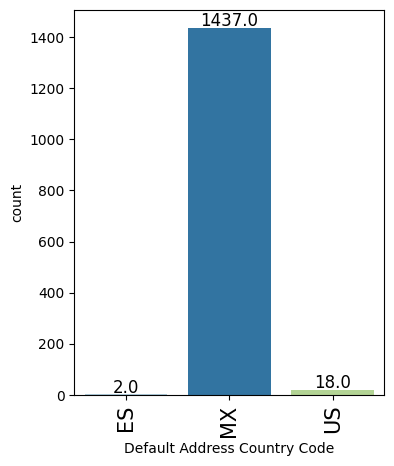

In [44]:
labeled_barplot(df_cx, 'Default Address Country Code')

**Default Address City**

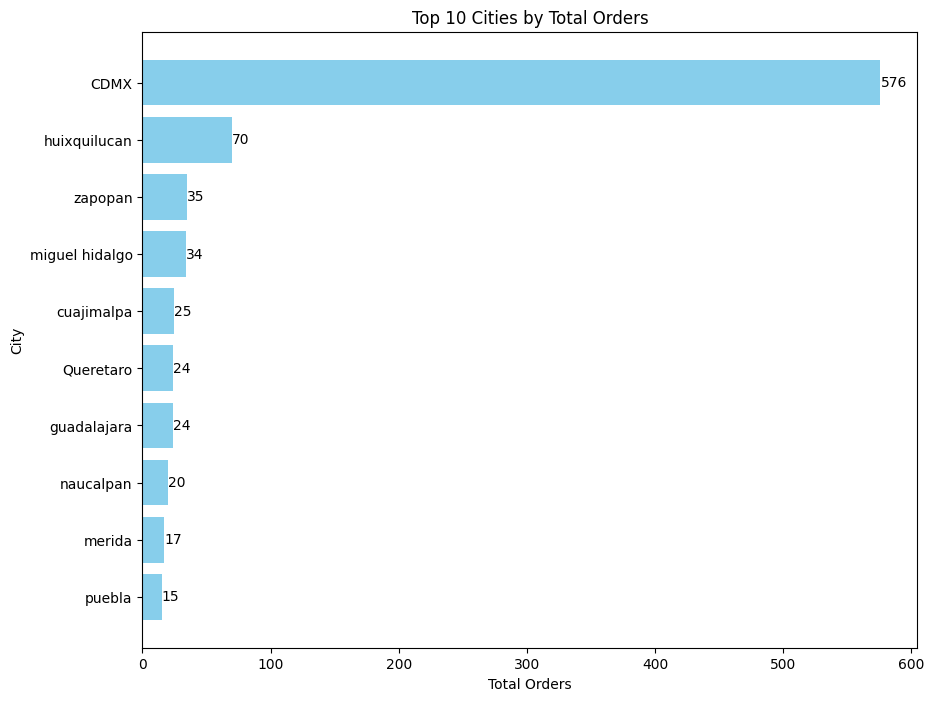

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Example mapping for common city names
city_mapping = {
    "cdmx": "CDMX",
    "ciudad de méxico": "CDMX",
    "ciudad de mexico": "CDMX",
    "méxico": "CDMX",
    "mexico": "CDMX",
    "mexico city": "CDMX",
    "queretaro": "Queretaro",
}

city_order_counts = df_cx.groupby('Default Address City').agg({'Total Orders': 'sum'}).reset_index()

# Normalize the city names using your mapping
city_order_counts['Default Address City'] = city_order_counts['Default Address City'].str.lower()
city_order_counts['Default Address City'] = city_order_counts['Default Address City'].replace(city_mapping)

# Re-aggregate after normalization
city_order_counts = city_order_counts.groupby('Default Address City').agg({'Total Orders': 'sum'}).reset_index()

# Sort and take the top 10
top_10_cities = city_order_counts.sort_values(by='Total Orders', ascending=False).head(10)

# Plotting function with order labels
def labeled_barplot(data, x_column, y_column):
    plt.figure(figsize=(10, 8))
    bars = plt.barh(data[x_column], data[y_column], color='skyblue')
    plt.xlabel('Total Orders')
    plt.ylabel('City')
    plt.title(f'Top 10 Cities by {y_column}')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest count at the top

    # Add labels on the bars
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}',
                 va='center', ha='left', color='black')

    plt.show()

# Plot the top 10 cities by total orders
labeled_barplot(top_10_cities, 'Default Address City', 'Total Orders')


In [46]:
import pandas as pd

# Assuming df_cx is your DataFrame
df = df_cx

# Example mapping for common city names
city_mapping = {
    "cdmx": "CDMX",
    "ciudad de méxico": "CDMX",
    "ciudad de mexico": "CDMX",
    "méxico": "CDMX",
    "mexico": "CDMX",
    "mexico city": "CDMX",
    "queretaro": "Queretaro",
}

# Normalize and aggregate data by city
df['Default Address City'] = df['Default Address City'].str.lower().replace(city_mapping)

# Aggregate the total orders by city
city_order_counts = df.groupby('Default Address City').agg({'Total Orders': 'sum'}).reset_index()

# Calculate the total number of orders across all cities
total_orders = city_order_counts['Total Orders'].sum()

# Calculate the percentage contribution for each city
city_order_counts['Contribution (%)'] = (city_order_counts['Total Orders'] / total_orders) * 100

# Sort the data by 'Total Orders' in descending order
aggregated_data_sorted2 = city_order_counts.sort_values(by='Total Orders', ascending=False)

# Format the 'Contribution (%)' column to two decimal places
aggregated_data_sorted2['Contribution (%)'] = aggregated_data_sorted2['Contribution (%)'].apply(lambda x: f"{x:.2f}%")

# Display the sorted table using Pandas
aggregated_data_sorted2.head()


,Default Address City,Total Orders,Contribution (%)
1,CDMX,576,41.98%
121,huixquilucan,70,5.10%
272,zapopan,35,2.55%
174,miguel hidalgo,34,2.48%
82,cuajimalpa,25,1.82%


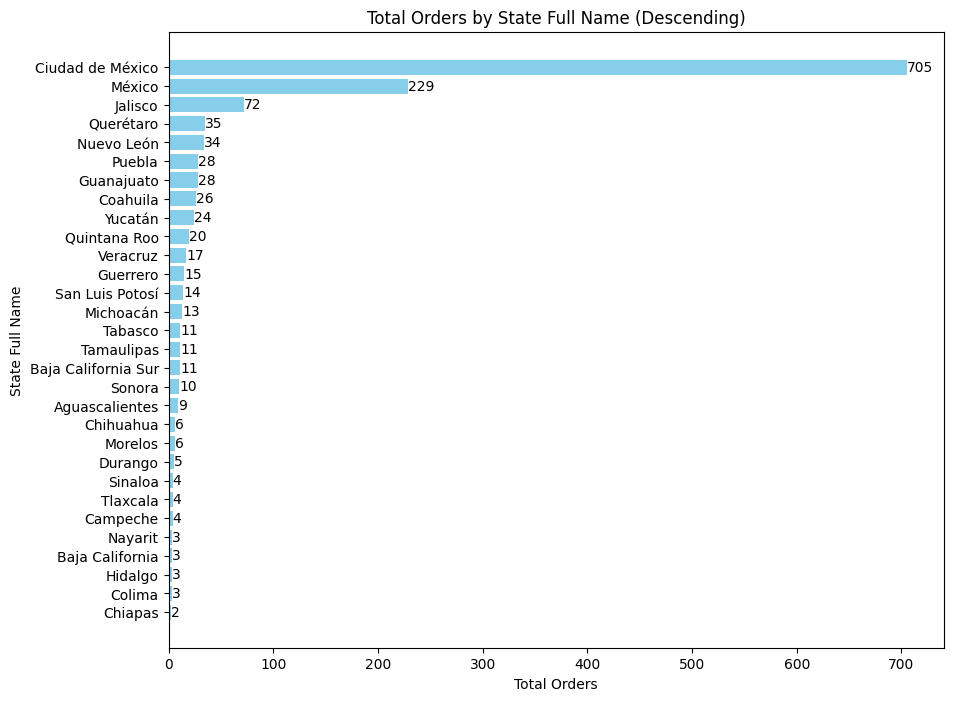

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for orders greater than or equal to 1
ordersGender3_df = df_cx[df_cx['Total Orders'] >= 1]

# Aggregate data by 'Default Address Province Code' and sum the total orders if necessary
province_order_counts = ordersGender3_df.groupby('State Full Name').agg({'Total Orders': 'sum'}).reset_index()

# Sort the data by 'Total Orders' in descending order
province_order_counts = province_order_counts.sort_values(by='Total Orders', ascending=False)

# Plotting function with descending order
def labeled_barplot(data, x_column, y_column):
    plt.figure(figsize=(10, 8))
    bars = plt.barh(data[x_column], data[y_column], color='skyblue')
    plt.xlabel('Total Orders')
    plt.ylabel('State Full Name')
    plt.title(f'Total Orders by State Full Name (Descending)')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest count at the top

    # Add labels on the bars
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}',
                 va='center', ha='left', color='black')

    plt.show()

# Plot the data with the updated function
labeled_barplot(province_order_counts, 'State Full Name', 'Total Orders')


**Orders Data Analysis**

In [48]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         3774 non-null   object 
 1   Email                        3767 non-null   object 
 2   Financial Status             1372 non-null   object 
 3   Paid at                      1372 non-null   object 
 4   Fulfillment Status           1372 non-null   object 
 5   Fulfilled at                 1370 non-null   object 
 6   Accepts Marketing            1372 non-null   object 
 7   Currency                     1372 non-null   object 
 8   Subtotal                     1372 non-null   float64
 9   Shipping                     1372 non-null   float64
 10  Taxes                        1372 non-null   float64
 11  Total                        1372 non-null   float64
 12  Discount Code                221 non-null    object 
 13  Discount Amount   

In [49]:
# Set the option to display all rows
pd.set_option('display.max_rows', None)

# Now when you call isnull().sum(), it will display all columns
df_orders.isnull().sum()

,0
Name,0
Email,7
Financial Status,2402
Paid at,2402
Fulfillment Status,2402
Fulfilled at,2404
Accepts Marketing,2402
Currency,2402
Subtotal,2402
Shipping,2402


**Dropping variables that are not usefull**

In [50]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

#Drop useless columns
df_orders.drop(columns=['Tax 1 Name'], inplace=True)
df_orders.drop(columns=['Tax 1 Value'], inplace=True)
df_orders.drop(columns=['Tax 2 Name'], inplace=True)
df_orders.drop(columns=['Tax 2 Value'], inplace=True)
df_orders.drop(columns=['Tax 3 Name'], inplace=True)
df_orders.drop(columns=['Tax 3 Value'], inplace=True)
df_orders.drop(columns=['Tax 4 Name'], inplace=True)
df_orders.drop(columns=['Tax 4 Value'], inplace=True)
df_orders.drop(columns=['Tax 5 Name'], inplace=True)
df_orders.drop(columns=['Tax 5 Value'], inplace=True)
df_orders.drop(columns=['Phone'], inplace=True)
df_orders.drop(columns=['Receipt Number'], inplace=True)
df_orders.drop(columns=['Duties'], inplace=True)
df_orders.drop(columns=['Payment Terms Name'], inplace=True)
df_orders.drop(columns=['Next Payment Due At'], inplace=True)

# Now when you call df_orders.head(), it will display all columns
df_orders.head(5)




,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Name,Billing Street,Billing Address1,Billing Address2,Billing Company,Billing City,Billing Zip,Billing Province,Billing Country,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Outstanding Balance,Employee,Location,Device ID,Id,Tags,Risk Level,Source,Lineitem discount,Billing Province Name,Shipping Province Name,Payment ID,Payment References
0,#2372SP,gvelazquezu@gmail.com,paid,2024-08-09 14:55:37 -0600,fulfilled,2024-08-09 17:52:38 -0600,yes,MXN,2143.5,0.0,0.0,2143.5,NaN,2143.5,Envío Gratis.,2024-08-09 14:55:36 -0600,1,Traje De Baño Hombre Modelo Marine Knots - M,1429.0,NaN,7.506382e+12,True,True,fulfilled,Gerardo Velazquez Urbina,"Dallas 85, 301",Dallas 85,301,NaN,Mex,'03810,DF,MX,5544846138,Gerardo Velazquez,"Canoa 235, 1-2004",Canoa 235,1-2004,NaN,Mex,'01090,DF,MX,5544846138,NaN,NaN,NaN,Mercado Pago Tarjetas,r6suOBchcjGb4URPmCDw0ic6u,0.0,TINTARELLA SWIMWEAR & CO,0.0,NaN,NaN,NaN,5.793806e+12,NaN,Low,web,714.5,Ciudad de México,Ciudad de México,r6suOBchcjGb4URPmCDw0ic6u,r6suOBchcjGb4URPmCDw0ic6u
1,#2372SP,gvelazquezu@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-09 14:55:36 -0600,1,Traje De Baño Hombre Pink Origamix - M,1429.0,NaN,7.506382e+12,True,True,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TINTARELLA SWIMWEAR & CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,714.5,NaN,NaN,NaN,NaN
2,#2372SP,gvelazquezu@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-09 14:55:36 -0600,1,Traje De Baño Hombre Frogy Line - M,1429.0,NaN,7.506382e+12,True,True,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TINTARELLA SWIMWEAR & CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,714.5,NaN,NaN,NaN,NaN
3,#2371SP,maggie_parra@hotmail.com,paid,2024-08-09 13:26:47 -0600,fulfilled,2024-08-09 17:50:23 -0600,yes,MXN,1698.0,149.0,0.0,1847.0,NaN,1698.0,Estándar (2 a 5 días hábiles) Los tiempos de e...,2024-08-09 13:26:47 -0600,1,Traje De Baño Niño Modelo Color Frogs - 7-8A,849.0,NaN,7.506382e+12,True,True,fulfilled,Maggie Parra,"Cerro San andres 29, Campestre churubusco",Cerro San andres 29,Campestre churubusco,NaN,Coyoacán,'04200,DF,MX,+525528883710,Maggie Parra,"Cerro San andres 29, Campestre churubusco",Cerro San andres 29,Campestre churubusco,NaN,Coyoacán,'04200,DF,MX,+525528883710,NaN,NaN,NaN,PayPal Express Checkout,rTWSCiV6l5SVs5YdJovKThMkK,0.0,TINTARELLA SWIMWEAR & CO,0.0,NaN,NaN,NaN,5.793713e+12,NaN,Low,web,424.5,Ciudad de México,Ciudad de México,rTWSCiV6l5SVs5YdJovKThMkK,rTWSCiV6l5SVs5YdJovKThMkK
4,#2371SP,maggie_parra@hotmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-09 13:26:47 -0600,1,Traje De Baño Niño Modelo Origanimal Aqua - 7-8A,849.0,NaN,7.506382e+12,True,True,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TINTARELLA SWIMWEAR & CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424.5,NaN,NaN,NaN,NaN


**Treating missing values in orders**

In [51]:
#We create a new Dataset called df_grouped where we use the aggregation and concat to either sum the values or replace the missing values
# Sample aggregation functions based on the column types
aggregation_functions = {
    'Subtotal': 'sum',
    'Total': 'sum',
    'Discount Amount': 'sum',
    'Lineitem quantity': 'sum',
    'Lineitem name': lambda x: list(x.dropna().unique()),
    'Lineitem price': lambda x: list(x.dropna().unique()),
    'Lineitem sku': lambda x: list(x.dropna().unique())
}

# Define a function to concatenate non-null unique values in a column
def concat_unique(series):
    return ', '.join(map(str, series.dropna().unique()))

# Default aggregation for all other columns: concatenate unique values
default_agg = {col: concat_unique for col in df_orders.columns if col not in aggregation_functions}

# Combine the specific aggregation rules with the default
agg_funcs = {**default_agg, **aggregation_functions}

# Group by the "Name" (or ID) column and apply the appropriate aggregation function
df_grouped = df_orders.groupby('Name', as_index=False).agg(agg_funcs)



In [52]:
# Display the resulting DataFrame
df_grouped.head(20)

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Shipping,Taxes,Discount Code,Shipping Method,Created at,Lineitem compare at price,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Name,Billing Street,Billing Address1,Billing Address2,Billing Company,Billing City,Billing Zip,Billing Province,Billing Country,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Outstanding Balance,Employee,Location,Device ID,Id,Tags,Risk Level,Source,Lineitem discount,Billing Province Name,Shipping Province Name,Payment ID,Payment References,Subtotal,Total,Discount Amount,Lineitem quantity,Lineitem name,Lineitem price,Lineitem sku
0,#1001SP,sm_aguirre@hotmail.com,paid,2022-05-06 13:08:18 -0500,fulfilled,2022-05-09 10:28:25 -0500,yes,MXN,134.0,0.0,,Express (2 a 3 Días hábiles),2022-05-06 13:08:18 -0500,,True,True,fulfilled,melissa aguirre,"san luis 40, la primavera",san luis 40,la primavera,,culiacan,'80199,SIN,MX,667 751 4078,melissa aguirre,"san luis 40, la primavera",san luis 40,la primavera,,culiacan,'80199,SIN,MX,667 751 4078,,,,Pago con tarjeta de crédito y débito,c32828237971708.1,0.0,TINTARELLA SWIMWEAR & CO,0.0,,,,4787932758268.0,ENTREGADO,Low,web,0.0,Sinaloa,Sinaloa,a640aca3d19588451313981eedcba33b,a640aca3d19588451313981eedcba33b,1429.00,1563.00,0.00,1,[TRAJE DE BAÑO HOMBRE MODELO LIME LINE - L],[1429.0],[7506382416321.0]
1,#1002SP,paulappt18@gmail.com,paid,2022-05-07 13:25:52 -0500,fulfilled,2022-05-09 10:39:06 -0500,no,MXN,122.0,0.0,,Estándar (3 - 5 Días Hábiles),2022-05-07 13:25:51 -0500,1429.0,True,True,fulfilled,Paula Puron,camino real a cholula 4814 fraccionamiento la ...,camino real a cholula 4814 fraccionamiento la ...,Casa nunero 7,,Puebla,'72813,PUE,MX,222 435 6943,Paula Puron,camino real a cholula 4814 fraccionamiento la ...,camino real a cholula 4814 fraccionamiento la ...,Casa nunero 7,,Puebla,'72813,PUE,MX,222 435 6943,,,,Pago con tarjeta de crédito y débito,c32829180346620.1,0.0,TINTARELLA SWIMWEAR & CO,0.0,,,,4788941652220.0,ENTREGADO,Low,580111,0.0,Puebla,Puebla,b38177fe6289c88a2a25ead8e208dc64,b38177fe6289c88a2a25ead8e208dc64,571.60,693.60,0.00,1,[TRAJE DE BAÑO HOMBRE DRAGON FLY - S],[571.6],[7506382409064.0]
2,#1003SP,rogerjimro@hotmail.com,paid,2022-05-07 15:09:30 -0500,fulfilled,2022-05-09 10:48:15 -0500,yes,MXN,134.0,0.0,,Express (2 a 3 Días hábiles),2022-05-07 15:09:30 -0500,1299.0,True,True,fulfilled,Roger Jimenez,"Privada de la Cañada 30 , 402C",Privada de la Cañada 30,402C,,Huixquilucan,'52774,MEX,MX,55 1353 1995,Roger Jimenez,"Privada de la Cañada 30 , 402C",Privada de la Cañada 30,402C,,Huixquilucan,'52774,MEX,MX,55 1353 1995,,,,Pago con tarjeta de crédito y débito,c32832270336252.1,0.0,TINTARELLA SWIMWEAR & CO,0.0,,,,4789060731132.0,ENTREGADO,Low,web,0.0,Estado de México,Estado de México,5b6bc0740d8be4a6a71b7a06e7852a05,5b6bc0740d8be4a6a71b7a06e7852a05,519.60,653.60,0.00,1,[TRAJE DE BAÑO HOMBRE LOBSTERS - XL],[519.6],[7506382406391.0]
3,#1004SP,gonzalorz1985@gmail.com,paid,2022-05-10 12:23:23 -0500,fulfilled,2022-05-10 13:30:39 -0500,yes,MXN,122.0,0.0,TEQUESMAYO22,Estándar (3 - 5 Días Hábiles),2022-05-10 12:23:22 -0500,,True,True,fulfilled,Gonzalo Rodríguez,"Damas 110, 701",Damas 110,701,,cdmx,'03900,DF,MX,55 2899 8530,Gonzalo Rodríguez,"Damas 110, 701",Damas 110,701,,cdmx,'03900,DF,MX,55 2899 8530,,,,Pago con tarjeta de crédito y débito,c32842140680444.1,0.0,TINTARELLA SWIMWEAR & CO,0.0,,,,4791490576636.0,ENTREGADO,Low,web,0.0,Ciudad de México,Ciudad de México,6e44c69b9b34d52e6aed6a0da7f40882,6e44c69b9b34d52e6aed6a0da7f40882,1143.20,1265.20,285.80,1,[TRAJE DE BAÑO HOMBRE MODELO CANDY PENGUINS - L],[1429.0],[7506382416086.0]
4,#1005SP,maximo.1996@hotmail.com,paid,2022-05-10 20:54:59 -0500,fulfilled,2022-05-11 10:51:34 -0500

In [53]:
# Filter the dataset for rows where 'lineitem quantity' is greater than or equal to 10
filtered_df = df_grouped[df_grouped['Lineitem quantity'] >= 20]

# Display the filtered DataFrame
filtered_df.head(10)

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Shipping,Taxes,Discount Code,Shipping Method,Created at,Lineitem compare at price,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Name,Billing Street,Billing Address1,Billing Address2,Billing Company,Billing City,Billing Zip,Billing Province,Billing Country,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Outstanding Balance,Employee,Location,Device ID,Id,Tags,Risk Level,Source,Lineitem discount,Billing Province Name,Shipping Province Name,Payment ID,Payment References,Subtotal,Total,Discount Amount,Lineitem quantity,Lineitem name,Lineitem price,Lineitem sku
1153,#2154SP,patricio.kegel@gmail.com,paid,2024-04-09 16:31:02 -0600,fulfilled,2024-04-10 12:17:33 -0600,yes,MXN,0.0,0.0,PK40,Envío gratis. *Estándar,2024-04-09 16:31:01 -0600,,True,True,fulfilled,Roberta Saldaña,Fuente del Rey,Fuente del Rey,,,Naucalpan de Juárez,'52780,MEX,MX,5531908516,Roberta Saldaña,"Calle 56 Norte 5, Fracc. Selvanova; coto 5; de...",Calle 56 Norte 5,Fracc. Selvanova; coto 5; dept 515E,,Playa del Carmen,'77723,Q ROO,MX,5531908516,,,,Credit/Debit card by PayPal,rmeBCfH0EhMnwpmUSiXwKWV3w,0.0,TINTARELLA SWIMWEAR & CO,0.0,,,,5655187718396.0,,Low,web,0.0,Estado de México,Quintana Roo,rmeBCfH0EhMnwpmUSiXwKWV3w,rmeBCfH0EhMnwpmUSiXwKWV3w,5203.4,5203.4,46830.6,66,[TRAJE DE BAÑO NIÑO MODELO RAINBOW FISH - 3-4A...,"[849.0, 599.0, 899.0, 549.0, 799.0]","[7506382425538.0, 7506382427969.0, 75063824192..."
1158,#2159SP,magaliruizmarch@hotmail.com,paid,2024-04-10 19:04:38 -0600,fulfilled,2024-04-10 21:43:14 -0600,no,MXN,0.0,0.0,MR40,Envío gratis. *Estándar,2024-04-10 19:04:38 -0600,,True,True,fulfilled,MAGALI RUIZ MARCH,"hacienda del ciervo 8, 2003",hacienda del ciervo 8,2003,,CDMX,'52763,MEX,MX,5519164496,MAGALI RUIZ MARCH,"hacienda del ciervo 8, 2003",hacienda del ciervo 8,2003,,CDMX,'52763,MEX,MX,5519164496,,,,Credit/Debit card by PayPal,rxDKVdtLVssOtahwV94CxFhmL,0.0,TINTARELLA SWIMWEAR & CO,0.0,,,,5656345149692.0,,Low,web,0.0,Estado de México,Estado de México,rxDKVdtLVssOtahwV94CxFhmL,rxDKVdtLVssOtahwV94CxFhmL,4489.9,4489.9,40409.1,31,"[TRAJE DE BAÑO HOMBRE MODELO SOLID GREEN - S, ...","[1899.0, 1429.0, 549.0, 849.0, 1699.0, 799.0]","[7506382428195.0, 7506382428096.0, 75063824236..."


**Orders Total**

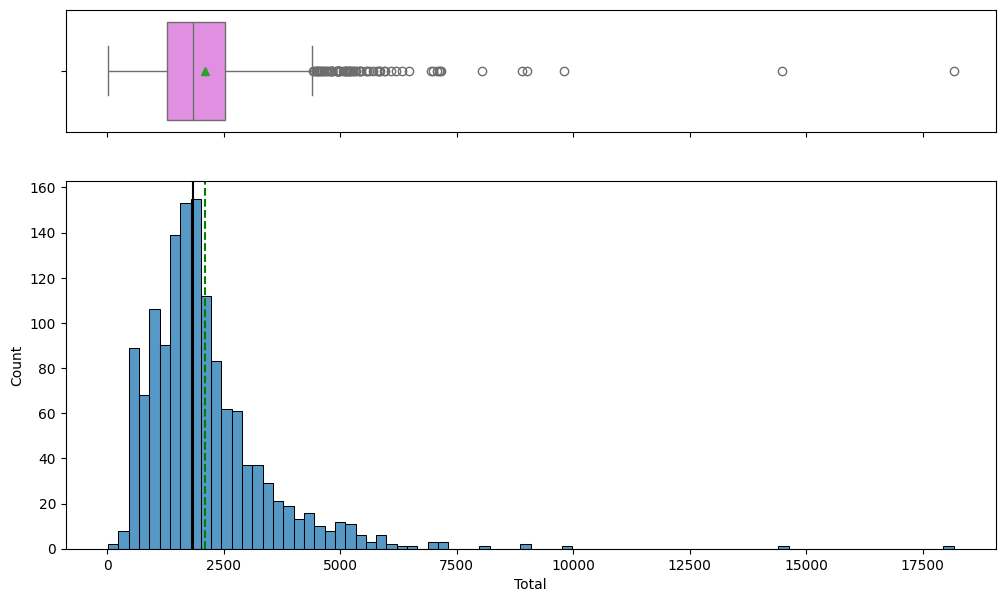

In [54]:
histogram_boxplot(df_grouped,'Total')

**Orders Subtotal**

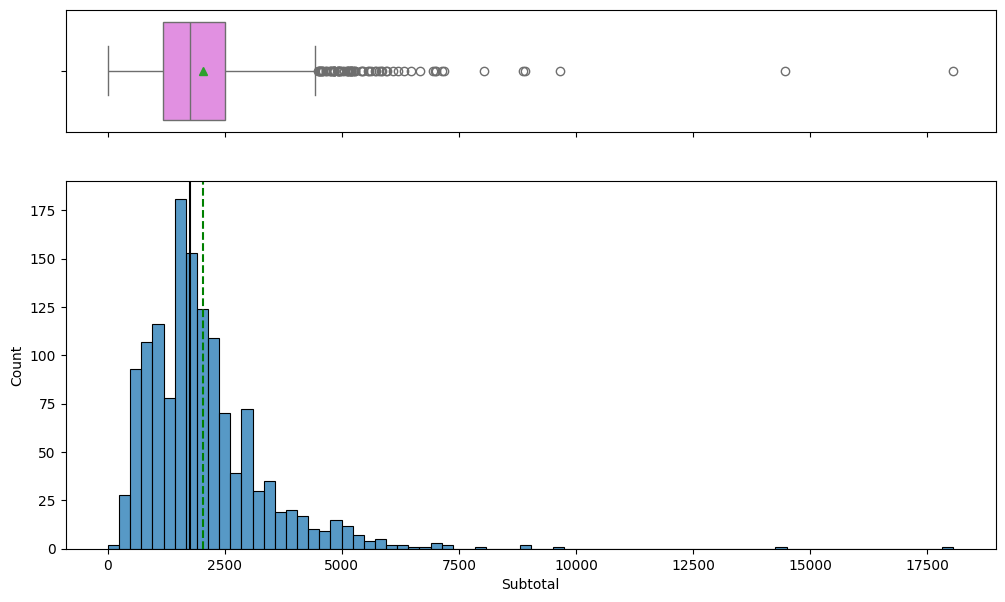

In [55]:
histogram_boxplot(df_grouped,'Subtotal')

**Orders Lineitem Quantity**

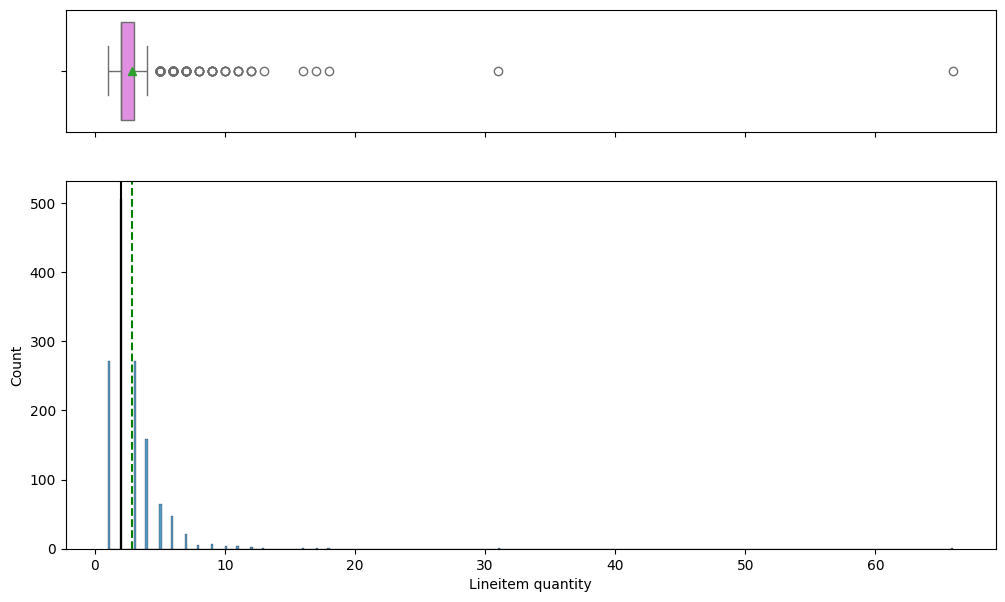

In [56]:
histogram_boxplot(df_grouped,'Lineitem quantity')

**Orders Payment Method**

In [57]:
# Check the data type of the 'Paid at' column
print(df_orders['Created at'].dtype)

# Convert 'Paid at' to datetime with UTC
df_orders['Created at'] = pd.to_datetime(df_orders['Created at'], utc=True)

# Check the data type again to confirm
print(df_orders['Created at'].dtype)


# Extract year and month from the 'Paid at' column
df_orders['Year'] = df_orders['Created at'].dt.year
df_orders['Month'] = df_orders['Created at'].dt.month


object
datetime64[ns, UTC]


In [58]:
df_orders.head()

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Name,Billing Street,Billing Address1,Billing Address2,Billing Company,Billing City,Billing Zip,Billing Province,Billing Country,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Outstanding Balance,Employee,Location,Device ID,Id,Tags,Risk Level,Source,Lineitem discount,Billing Province Name,Shipping Province Name,Payment ID,Payment References,Year,Month
0,#2372SP,gvelazquezu@gmail.com,paid,2024-08-09 14:55:37 -0600,fulfilled,2024-08-09 17:52:38 -0600,yes,MXN,2143.5,0.0,0.0,2143.5,NaN,2143.5,Envío Gratis.,2024-08-09 20:55:36+00:00,1,Traje De Baño Hombre Modelo Marine Knots - M,1429.0,NaN,7.506382e+12,True,True,fulfilled,Gerardo Velazquez Urbina,"Dallas 85, 301",Dallas 85,301,NaN,Mex,'03810,DF,MX,5544846138,Gerardo Velazquez,"Canoa 235, 1-2004",Canoa 235,1-2004,NaN,Mex,'01090,DF,MX,5544846138,NaN,NaN,NaN,Mercado Pago Tarjetas,r6suOBchcjGb4URPmCDw0ic6u,0.0,TINTARELLA SWIMWEAR & CO,0.0,NaN,NaN,NaN,5.793806e+12,NaN,Low,web,714.5,Ciudad de México,Ciudad de México,r6suOBchcjGb4URPmCDw0ic6u,r6suOBchcjGb4URPmCDw0ic6u,2024,8
1,#2372SP,gvelazquezu@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-09 20:55:36+00:00,1,Traje De Baño Hombre Pink Origamix - M,1429.0,NaN,7.506382e+12,True,True,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TINTARELLA SWIMWEAR & CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,714.5,NaN,NaN,NaN,NaN,2024,8
2,#2372SP,gvelazquezu@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-09 20:55:36+00:00,1,Traje De Baño Hombre Frogy Line - M,1429.0,NaN,7.506382e+12,True,True,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TINTARELLA SWIMWEAR & CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,714.5,NaN,NaN,NaN,NaN,2024,8
3,#2371SP,maggie_parra@hotmail.com,paid,2024-08-09 13:26:47 -0600,fulfilled,2024-08-09 17:50:23 -0600,yes,MXN,1698.0,149.0,0.0,1847.0,NaN,1698.0,Estándar (2 a 5 días hábiles) Los tiempos de e...,2024-08-09 19:26:47+00:00,1,Traje De Baño Niño Modelo Color Frogs - 7-8A,849.0,NaN,7.506382e+12,True,True,fulfilled,Maggie Parra,"Cerro San andres 29, Campestre churubusco",Cerro San andres 29,Campestre churubusco,NaN,Coyoacán,'04200,DF,MX,+525528883710,Maggie Parra,"Cerro San andres 29, Campestre churubusco",Cerro San andres 29,Campestre churubusco,NaN,Coyoacán,'04200,DF,MX,+525528883710,NaN,NaN,NaN,PayPal Express Checkout,rTWSCiV6l5SVs5YdJovKThMkK,0.0,TINTARELLA SWIMWEAR & CO,0.0,NaN,NaN,NaN,5.793713e+12,NaN,Low,web,424.5,Ciudad de México,Ciudad de México,rTWSCiV6l5SVs5YdJovKThMkK,rTWSCiV6l5SVs5YdJovKThMkK,2024,8
4,#2371SP,maggie_parra@hotmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-09 19:26:47+00:00,1,Traje De Baño Niño Modelo Origanimal Aqua - 7-8A,849.0,NaN,7.506382e+12,True,True,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TINTARELLA SWIMWEAR & CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424.5,NaN,NaN,NaN,NaN,2024,8


In [60]:
import pandas as pd

# Create the structured DataFrame
data = {
    'Category': ['Genero', 'Genero', 'Genero', 'Genero', 'Genero',
                 'Ubicacion', 'Ubicacion', 'Ubicacion', 'Ubicacion', 'Ubicacion',
                 'Envio', 'Envio', 'Envio'],
    'Subcategory': ['Mujer', 'Hombre', 'Mujer, hombre', 'Hombre, mujer', 'Desconocido',
                    'DF', 'JAL', 'YUC', 'MEX', 'COAH',
                    'Expres', 'Estandard', 'Gratis'],
    'High-value': [40, 7, 1, 1, 0, 27, 4, 0, 4, 2, 18, 39, 18],
    'Alta frecuencia': [70, 22, 3, 2, 2, 44, 5, 0, 19, 4, 15, 70, 45],
    'Alta Recencia': [176, 61, 0, 0, 2, 117, 7, 7, 40, 5, 46, 170, 23],
    'Alta economía': [216, 85, 4, 2, 2, 139, 17, 8, 45, 10, 65, 186, 107],
    'Abandono': [115, 38, 0, 0, 22, 0, 0, 0, 0, 0, 0, 0, 0]
}

df = pd.DataFrame(data)

# Normalize category names if needed
df['Category'] = df['Category'].str.capitalize()

# Calculate percentages or other metrics if necessary
# For example, percentage of High-value orders for each category:
df['High-value %'] = (df['High-value'] / df['High-value'].sum()) * 100

# Display the structured DataFrame
print(df)


     Category    Subcategory  High-value  Alta frecuencia  Alta Recencia  \
0      Genero          Mujer          40               70            176   
1      Genero         Hombre           7               22             61   
2      Genero  Mujer, hombre           1                3              0   
3      Genero  Hombre, mujer           1                2              0   
4      Genero    Desconocido           0                2              2   
5   Ubicacion             DF          27               44            117   
6   Ubicacion            JAL           4                5              7   
7   Ubicacion            YUC           0                0              7   
8   Ubicacion            MEX           4               19             40   
9   Ubicacion           COAH           2                4              5   
10      Envio         Expres          18               15             46   
11      Envio      Estandard          39               70            170   
12      Envi

In [59]:
# List of columns to include in the Product DataFrame
columns_to_include = ['Name', 'Paid at', 'Lineitem quantity', 'Lineitem name', 'Lineitem price', 'Lineitem compare at price', 'Lineitem sku', 'Shipping City', 'Shipping Zip', 'Shipping Province', 'Payment Method','Year']

# Create the new DataFrame with the specified columns
products_data = df_grouped[columns_to_include].copy()

# Convert the 'Lineitem sku' column to object (string) type
products_data['Lineitem sku'] = products_data['Lineitem sku'].astype('object')

# Display the new DataFrame
products_data.head()

KeyError: "['Year'] not in index"

In [ ]:
# List of columns to include in the Product DataFrame
columns_to_include = ['Name', 'Paid at', 'Lineitem quantity', 'Lineitem name', 'Lineitem price', 'Lineitem compare at price', 'Lineitem sku', 'Shipping City', 'Shipping Zip', 'Shipping Province', 'Payment Method','Year']

# Create the new DataFrame with the specified columns
products_data2 = df_orders[columns_to_include].copy()

# Convert the 'Lineitem sku' column to object (string) type
products_data2['Lineitem sku'] = products_data['Lineitem sku'].astype('object')

# Display the new DataFrame
products_data2.head()